#  Hypothesis Tests Concerning the Population Mean

In hypothesis testing, two types of mistakes are possible:

* The null hypothesis is rejected although it is true (type-I-error)

* The null hypothesis is not rejected although it is false (type-II-error)


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import os

import matplotlib.pyplot as plt

In [2]:
arr = np.array([3, 2, 34])
stats.moment(arr, 2)

220.66666666666666

In [3]:
stats.describe(arr)

DescribeResult(nobs=3, minmax=(2, 34), mean=13.0, variance=331.0, skewness=0.7047042291017759, kurtosis=-1.4999999999999998)

## 1. Biased …

Consider the following alternative estimator for μY, the mean of the Yi



In this exercise we will illustrate that this estimator is a biased estimator for μY.

Instructions:

* Define a function Y_tilde that implements the estimator above.

* Randomly draw 5 observations from the N(10,25) distribution and compute an estimate using Y_tilde(). Repeat this procedure 10000 times and store the results in est_biased.

* Plot a histogram of est_biased.

* Add a red vertical line at μ=10 using the function abline().

In [4]:
def y_tilde(y):
    return (1/(len(y)-1)) * np.sum(y)

In [5]:
my_norm_1 = stats.norm(10, np.sqrt(25))

In [6]:
est_biased = []
for i in range(1,10000):
    est_biased.append(y_tilde(my_norm_1.rvs(5)))

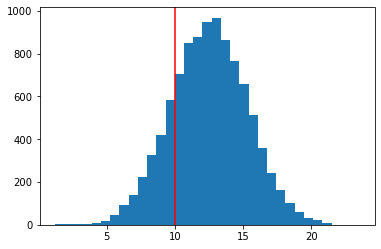

In [7]:
%matplotlib inline

plt.hist(est_biased, bins=33)
plt.axvline(10, color = 'red')
plt.show()

## 2. … but consistent estimator

Consider again the estimator from the previous exercise. It is available in your environment as the function Y_tilde(). You are requested to do the same procedure as in the previous exercise. This time, however, increase the number of observations to draw from 5 to 1000.

What do you notice? What can you say about this estimator?

Instructions:

* Randomly draw 1000 observations from the N(10,25) distribution and compute an estimate of the mean using Y_tilde(). Repeat this procedure 10000 times and store the results in est_consistent.

* Plot a histogram of est_consistent.

* Add a red vertical line at μ=10 using the function abline().

In [8]:
est_consistent = []
for i in range(1,10000):
    est_consistent.append(y_tilde(my_norm_1.rvs(1000)))

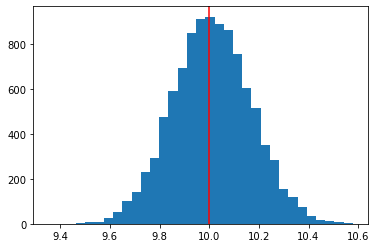

In [9]:
%matplotlib inline

plt.hist(est_consistent, bins=33)
plt.axvline(10, color = 'red')
plt.show()

## 3. Efficiency of an Estimator

In this exercise we want to illustrate the result that the sample mean ^μY=n∑i=1aiYi
with the equal weighting scheme ai=1n for i=1,...,n is the best linear unbiased estimator (BLUE) of μY.

As an alternative, consider the estimator

~μY=n∑i=1biYi

where bi gives the first n2 observations a higher weighting than the second n2 observations (we assume that n is even for simplicity).

The vector of weights w has been defined already and is available in your working environment.

Instructions:

* Verify that ~μ is an unbiased estimator of μY, the mean of the Yi.

* Implement the alternative estimator of μY as a function mu_tilde().

* Randomly draw 100 observations from the N(5,10) distribution and compute estimates with both estimators. 

* Repeat this procedure 10000 times and store the results in est_bar and est_tilde.

* Compute the sample variances of est_bar and est_tilde. What can you say about both estimators?

In [10]:
n = 100
w = []
for i in range(1, int(n/2)+1):
    w.append((1+0.5)/(n))
for i in range(1, int(n/2)+1):
    w.append((1-0.5)/(n))

sum(w*n)

99.99999999999794

In [11]:
def mu_tilde(x):
    return sum(w*x)

In [12]:
my_norm_2 = stats.norm(5, 10)
est_bar = []
for i in range(1,10000):
    est_bar.append(np.mean(my_norm_2.rvs(100)))

In [13]:
est_tilde = []
for i in range(1,10000):
    est_tilde.append(mu_tilde(my_norm_2.rvs(100)))

In [14]:
np.var(est_bar)

1.0194384758963613

In [15]:
np.var(est_tilde)

1.2754272241646525

## 4. Hypothesis Test — t-statistic

Consider the CPS dataset from Chapter 3.6 again. The dataset cps is available in your working environment.

We suppose that the average hourly earnings (in prices of 2012) ahe12 exceed 23.50 $/h and wish to test this hypothesis at a significance level of α=0.05. 

Please do the following:

Instructions:

* Compute the test statistic by hand and assign it to tstat.

* Use tstat to accept or reject the null hypothesis. Please do so using the normal approximation.


In [16]:
cps = pd.read_csv('data/cps_ch3.csv', sep = ';')

In [17]:
cps

,a_sex,year,ahe12
0,1,1992,18.309689
1,1,1992,16.364285
2,1,1992,24.476494
3,2,1992,14.171628
4,1,1992,23.602333
...,...,...,...
19345,2,2012,17.307692
19346,2,2012,26.573427
19347,1,2012,46.153847
19348,2,2012,17.521368


In [18]:
# With scipy
stats.ttest_1samp(cps['ahe12'], 23.5)

Ttest_1sampResult(statistic=3.739356464602733, pvalue=0.0001850237078265723)

In [19]:
# By hand
tstat = (np.mean(cps['ahe12']) - 23.5)/(np.std(cps['ahe12'])/np.sqrt(len(cps['ahe12'])-1))

In [20]:
tstat

3.7393564646027326

In [21]:
tstat < stats.norm(0,1).ppf(0.95)

False

We do not reject the null hypothesis, that the hourly rate exceeds 23.5$/hr

To decide whether the null hypothesis is accepted or rejected you can compare the t-statistic with the respective quantile of the standard normal distribution. Use logical operators.

## 5. Hypothesis Test — p-value

Reconsider the test situation from the previous exercise. The dataset cps as well as the vector tstat are available in your working environment.

Instead of using the t-statistic as decision criterion you may also use the p-value. Now please do the following:

Instructions:

* Compute the p-value by hand and assign it to pval.

* Use pval to accept or reject the null hypothesis.

In [22]:
pval = 1 - stats.norm().cdf(tstat)

In [23]:
pval < 0.05

True

We do not reject the null hypothesis, that the hourly rate exceeds 23.5$/hr

## 6. Hypothesis Test — One Sample t-test

In the last two exercises we discussed two ways of conducting a hypothesis test. These approaches are somewhat cumbersome to apply by hand which is why R provides the function t.test(). It does most of the work automatically. t.test() provides t
-statistics, p-values and even confidence intervals (more on the latter in later exercises). Note that t.test() uses the t-distribution instead of the normal distribution which becomes important when the sample size is small.

The dataset cps and the variable pval from Exercise 3.4 are available in your working environment.

Instructions:

* Conduct the hypothesis test from previous exercises using the function t.test().

* Extract the t -statistic and the p-value from the list created by t.test(). Assign them to the variables tstat and pvalue.

* Verify that using the normal approximation here is valid as well by computing the difference between both p-values.

In [25]:
ttest = stats.ttest_1samp(cps['ahe12'], 23.5)

In [28]:
print(ttest)
print(ttest[0])
print(ttest[1])

Ttest_1sampResult(statistic=3.739356464602733, pvalue=0.0001850237078265723)
3.739356464602733
0.0001850237078265723


In [29]:
pval - ttest[1]

-9.277773003345724e-05

## 7. Hypothesis Test — Two Sample t-test

Consider the annual maximum sea levels at Port Pirie (Southern Australia) and Fremantle (Western Australia) for the last 30 years.

The observations are made available as vectors portpirie and fremantle in your working environment.

Instructions:

* Test whether there is a significant difference in the annual maximum sea levels at a significance level of α=0.05

.

In [38]:
portpirie = np.array([3.887578, 4.388305, 4.008977, 4.483017, 4.540467, 3.645556, 4.128105, 4.492419, 
4.151435, 4.056615, 4.556833, 4.053334, 4.277571, 4.172633, 3.702925, 4.499825, 
3.846088, 3.642060, 3.927921, 4.554504, 4.489539, 4.292803, 4.240507, 4.594270, 
4.255706, 4.308530, 4.144066, 4.194142, 3.889160, 3.747114])

fremantle = np.array([1.777815, 1.741379, 1.614423, 1.677280, 1.214768, 1.486678, 1.655076, 1.329845, 
            1.390909, 1.338975, 1.285680, 1.448728, 1.448235, 1.421307, 1.291467, 1.283284, 
            1.339820, 1.479577, 1.359584, 1.714697, 1.227499, 1.465320, 1.679355, 1.273140, 
            1.536569, 1.323919, 1.276519, 1.651985, 1.737027, 1.424678])

In [33]:
ttest_ind_1 = stats.ttest_ind(portpirie, fremantle)
print(ttest_ind_1)

Ttest_indResult(statistic=43.727350748286135, pvalue=4.207226753051045e-46)


P-value < 0.05, therefore we reject the null hypothesis.

## 8. Confidence Interval

Reconsider the test situation concerning the annual maximum sea levels at Port Pirie and Fremantle.

The variables portpirie and fremantle are again available in your working environment.

Instructions:

* Construct a 95%-confidence interval for the difference in the sea levels using t.test().

https://nikolh92.medium.com/confidence-intervals-in-hypothesis-testing-3dd573287d0e

https://stats.stackexchange.com/questions/475289/confidence-interval-for-2-sample-t-test-with-scipy

In [34]:
stats.t.interval(0.95, ttest_ind_1[0])

(-2.015722555656899, 2.015722555656899)

In [35]:
def welch_ttest(x1, x2,alternative):
    
    n1 = x1.size
    n2 = x2.size
    m1 = np.mean(x1)
    m2 = np.mean(x2)
    
    v1 = np.var(x1, ddof=1)
    v2 = np.var(x2, ddof=1)
    
    pooled_se = np.sqrt(v1 / n1 + v2 / n2)
    delta = m1-m2
    
    tstat = delta /  pooled_se
    df = (v1 / n1 + v2 / n2)**2 / (v1**2 / (n1**2 * (n1 - 1)) + v2**2 / (n2**2 * (n2 - 1)))
    
    # two side t-test
    p = 2 * stats.t.cdf(-abs(tstat), df)
    
    # upper and lower bounds
    lb = delta - stats.t.ppf(0.975,df)*pooled_se 
    ub = delta + stats.t.ppf(0.975,df)*pooled_se
  
    return pd.DataFrame(np.array([tstat,df,p,delta,lb,ub]).reshape(1,-1),
                         columns=['T statistic','df','pvalue 2 sided','Difference in mean','lb','ub'])

In [39]:
welch_ttest(portpirie, fremantle, 'equal')

,T statistic,df,pvalue 2 sided,Difference in mean,lb,ub
0,43.727351,47.347388,6.175523e-40,2.709216,2.584598,2.833833


## 9. (Co)variance and Correlation I

Consider a random sample (Xi,Yi)for i=1,...,100.

The respective vectors X and Y are available in your working environment.

Instructions:

* Compute the variance of X using the function cov().

* Compute the covariance of X and Y .

* Compute the correlation between X and Y.

In [43]:
X = np.array([964.3713, 953.7341, 969.2027, 975.3694, 910.6410, 960.0536, 932.2109, 995.2225, 
                974.3802, 946.3636, 900.9727, 976.8978, 983.7045, 929.5926, 954.7044, 944.2021, 
                941.8334, 948.7131, 956.1493, 981.7413, 900.5950, 938.7707, 907.0245, 928.3049, 
                966.8805, 937.9465, 911.9181, 904.9614, 992.7973, 934.4413, 995.9829, 992.9211, 
                903.5465, 977.4982, 985.4366, 961.9433, 916.9071, 991.8990, 989.4150, 994.7932, 
                947.2924, 904.8781, 965.4151, 955.2977, 927.9562, 922.7565, 914.7161, 904.5756, 
                980.8800, 957.2114, 975.4402, 934.8289, 916.3154, 983.9422, 990.5671, 916.8528, 
                908.3079, 998.7081, 977.8956, 918.2694, 980.4892, 911.0413, 925.0522, 950.1544, 
                989.0767, 976.8626, 954.5461, 907.6052, 984.5619, 924.2356, 921.9286, 997.1384, 
                927.4333, 960.2670, 979.7899, 913.8353, 966.0008, 955.2121, 950.4926, 983.9724, 
                964.6497, 908.2850, 961.5084, 949.5428, 922.9405, 985.6921, 945.3756, 909.4013, 
                970.8157, 979.1741, 900.3688, 937.5860, 904.7529, 975.5246, 904.5111, 951.3177, 
                920.2289, 953.7644, 932.5496, 958.3716])

Y = np.array([2619.161, 2762.331, 2996.383, 2828.683, 2542.701, 2949.092, 2698.442, 2852.761,
                2960.641, 2928.956, 2616.419, 2936.788, 3066.223, 2739.196, 2854.554, 2857.916,
                2777.424, 2790.310, 2948.539, 2899.909, 2709.740, 2824.113, 2842.623, 2880.987,
                2966.009, 2923.503, 2790.960, 2699.441, 2994.772, 2844.072, 3133.768, 3135.405,
                2789.587, 2837.655, 2987.305, 2736.246, 2589.131, 2881.194, 2929.651, 2971.813,
                2948.802, 2692.969, 2792.615, 2844.411, 2818.204, 2833.262, 2634.382, 2780.056,
                3004.494, 2796.508, 3067.589, 2745.435, 2723.442, 2989.252, 2929.690, 2699.230,
                2619.038, 3061.760, 2962.768, 2764.619, 2884.439, 2698.662, 2733.957, 2929.461,
                3099.485, 2965.682, 3152.400, 2614.042, 3007.706, 2884.111, 2861.039, 3018.833,
                2749.426, 2835.230, 2991.865, 2793.129, 2871.626, 2840.475, 2716.083, 2909.774,
                2822.295, 2795.814, 2958.987, 2975.506, 2658.192, 2973.955, 2914.582, 2600.404,
                2989.576, 2787.627, 2941.672, 2779.931, 2762.769, 2964.184, 2660.908, 2800.240,
                2831.533, 2812.698, 2813.342, 2955.034])

In [42]:
np.cov(X, X)

array([[897.16734028, 897.16734028],
       [897.16734028, 897.16734028]])

In [44]:
np.cov(X, Y)

array([[  897.16734028,  2857.19877382],
       [ 2857.19877382, 17580.48367689]])

In [47]:
np.corrcoef(X, Y)

array([[1.        , 0.71942963],
       [0.71942963, 1.        ]])